In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
from scipy.stats import levy_stable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt, log, exp
from tqdm.auto import tqdm

In [2]:
plt.style.use("default")
params = {'legend.fontsize': 50,
          'legend.handlelength': 2,
          "axes.labelsize": 60,
          "xtick.labelsize": 40,
          "ytick.labelsize": 40,
          "lines.linewidth": 2,
           "axes.titlesize":60,
         'font.size': 30}
matplotlib.rcParams.update(params)

In [3]:
class HeavyTailedNoise(sps.rv_continuous):
    def _pdf(self, x):
        return 3/4 * 1 / (1 + abs(x))**2.5

In [4]:
class HeavyTailedSquaredExperiments():
    def __init__(self, start, num_iter, b_0):
        self.start = start
        self.num_iter = num_iter
        self.b_0 = b_0
        
    """
    f = x^2/2 -> L = 1
    gamma = stepsize
    b_0 = initial parameter of scaling
    """
    def generate_noise(self, distr):
        sample = None
        while (sample is None):
            try:
                sample = distr.rvs(size=1)[0]
            except Exception:
                pass
        return sample
        
        
    def adagrad_quadratic(self, gamma, stopping='off'):
        points = [self.start]
        b = self.b_0
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            b = sqrt(b**2 + (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * (points[i - 1] + sample) / b)
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')
    
    
    def adagrad_quadratic_delay(self, gamma, stopping='off'):
        points = [self.start]
        b = self.b_0
        prev_b = b
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            b = sqrt(b**2 + (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * (points[i - 1] + sample) / prev_b)
            prev_b = b
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')
    
    def adagrad_quadratic_eta(self, gamma, stopping='off'):
        points = [self.start]
        b = self.b_0
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            b = sqrt(b**2 + gamma**2 * (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * (points[i - 1] + sample) / b)
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')


    def adagrad_quadratic_delay_eta(self, gamma, stopping='off'):
        points = [self.start]
        b = self.b_0
        prev_b = b
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            b = sqrt(b**2 + gamma**2 * (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * (points[i - 1] + sample) / prev_b)
            prev_b = b
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')
    
    
    def adagrad_clip_quadratic(self, gamma, bound=1/2, stopping='off'):
        points = [self.start]
        b = self.b_0
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            clip = min(1, bound / abs(points[i - 1] + sample))
            b = sqrt(b**2 + clip**2 * (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * clip * (points[i - 1] + sample) / b)
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')

  
    def adagrad_clip_quadratic_delay(self, gamma, bound=1/2, stopping='off'):
        points = [self.start]
        b = self.b_0
        prev_b = b
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            clip = min(1, bound / abs(points[i - 1] + sample))
            b = sqrt(b**2 + clip**2 * (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * clip * (points[i - 1] + sample) / prev_b)
            prev_b = b
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')


    def adagrad_clip_quadratic_eta(self, gamma, bound=1/2, stopping='off'):
        points = [self.start]
        b = self.b_0
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            clip = min(1, bound / abs(points[i - 1] + sample))
            b = sqrt(b**2 + gamma**2 * clip**2 * (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * clip * (points[i - 1] + sample) / b)
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')


    def adagrad_clip_quadratic_delay_eta(self, gamma, bound=1/2, stopping='off'):
        points = [self.start]
        b = self.b_0
        prev_b = b
        distribution = HeavyTailedNoise()
        for i in range(1, self.num_iter + 1):
            sample = self.generate_noise(distribution)
            clip = min(1, bound / abs(points[i - 1] + sample))
            b = sqrt(b**2 + gamma**2 * clip**2 * (points[i - 1] + sample)**2)
            points.append(points[i - 1] - gamma * clip * (points[i - 1] + sample) / prev_b)
            prev_b = b
            if abs(points[-1]) <= 10**(-3) and stopping == 'on':
                break
        return np.array(points, dtype='float')
    
    def tuning(self, num_of_stepsizes, run_name, flag, repeats, gamma=None, bound=0.5, C=1, log_scale=True):
        if not gamma:
            gammas = [1 / 2**i for i in range(num_of_stepsizes)]
        if gamma:
            gammas = [gamma]
        plots = []
        if not os.path.exists(run_name):
                os.mkdir(run_name)
        for gamma in tqdm(gammas):
            results = np.array([0] * (self.num_iter + 1))
            for i in range(repeats):
                if flag == 'AdaGrad':
                    points = self.adagrad_quadratic(gamma)
                if flag == 'Clipped-AdaGrad':
                    points = self.adagrad_clip_quadratic(gamma, bound)
                if flag == 'AdaGrad-delay':
                    points = self.adagrad_quadratic_delay(gamma)
                if flag == 'AdaGrad-eta':
                    points = self.adagrad_quadratic_eta(gamma) 
                if flag == 'AdaGrad-delay-eta':
                    points = self.adagrad_quadratic_delay_eta(gamma, bound)
                if flag == 'Clipped-AdaGrad-delay':
                    points = self.adagrad_clip_quadratic_delay(gamma, bound)
                if flag == 'Clipped-AdaGrad-eta':
                    points = self.adagrad_clip_quadratic_eta(gamma, bound)
                if flag == 'Clipped-AdaGrad-delay-eta':
                    points = self.adagrad_clip_quadratic_delay_eta(gamma, bound)
                results = results + points
                np.save(os.path.join(run_name, f"{flag}_{gamma:.4f}_{i}.npy"), results / (i+1)) 

            results /= repeats
            plots.append(np.abs(results))
        x = np.arange(0, self.num_iter + 1, 1)
        plt.figure(figsize=(30, 16))
        for i in range(len(gammas)):
            if log_scale:
                plt.semilogy(x, plots[i], label=f'gamma = {gammas[i]}')
                plt.xlabel('Number of iterations')
                plt.ylabel(r'$||x_k - x^*||$ in log scale')
            else:
                plt.plot(x, plots[i], '-.')
                plt.xlabel('Number of iterations')
                plt.ylabel(r'$||x_k -x^*||$')
        plt.title(f'{flag}')
        plt.grid()
        plt.legend()
        
    
    def tuning_const(self, gamma, repeats, num_const, base=2, log_scale=True):
        C = [base**i for i in range(num_const)]
        plots = []
        for c in tqdm(C):
            results = np.array([0] * (self.num_iter + 1))
            for i in range(repeats):
                points = self.adagrad_clip_quadratic(gamma, c)
                results = results + points
            results /= repeats
            plots.append(np.abs(results))
        x = np.arange(0, self.num_iter + 1, 1)
        plt.figure(figsize=(30, 16))
        for i in range(len(C)):
            if log_scale:
                plt.semilogy(x, plots[i], label=f'C = {C[i]}')
                plt.xlabel('Number of iterations')
                plt.ylabel(r'$||x_k - x^*||$ in log scale')
            else:
                plt.plot(x, plots[i], '-.')
                plt.xlabel('Number of iterations')
                plt.ylabel(r'$||x_k -x^*||$')
        plt.title('Exponential decrease')
        plt.grid()
        plt.legend()

### run the experiment

  0%|          | 0/1 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2060: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


CPU times: user 34min 5s, sys: 21.5 s, total: 34min 27s
Wall time: 35min 8s


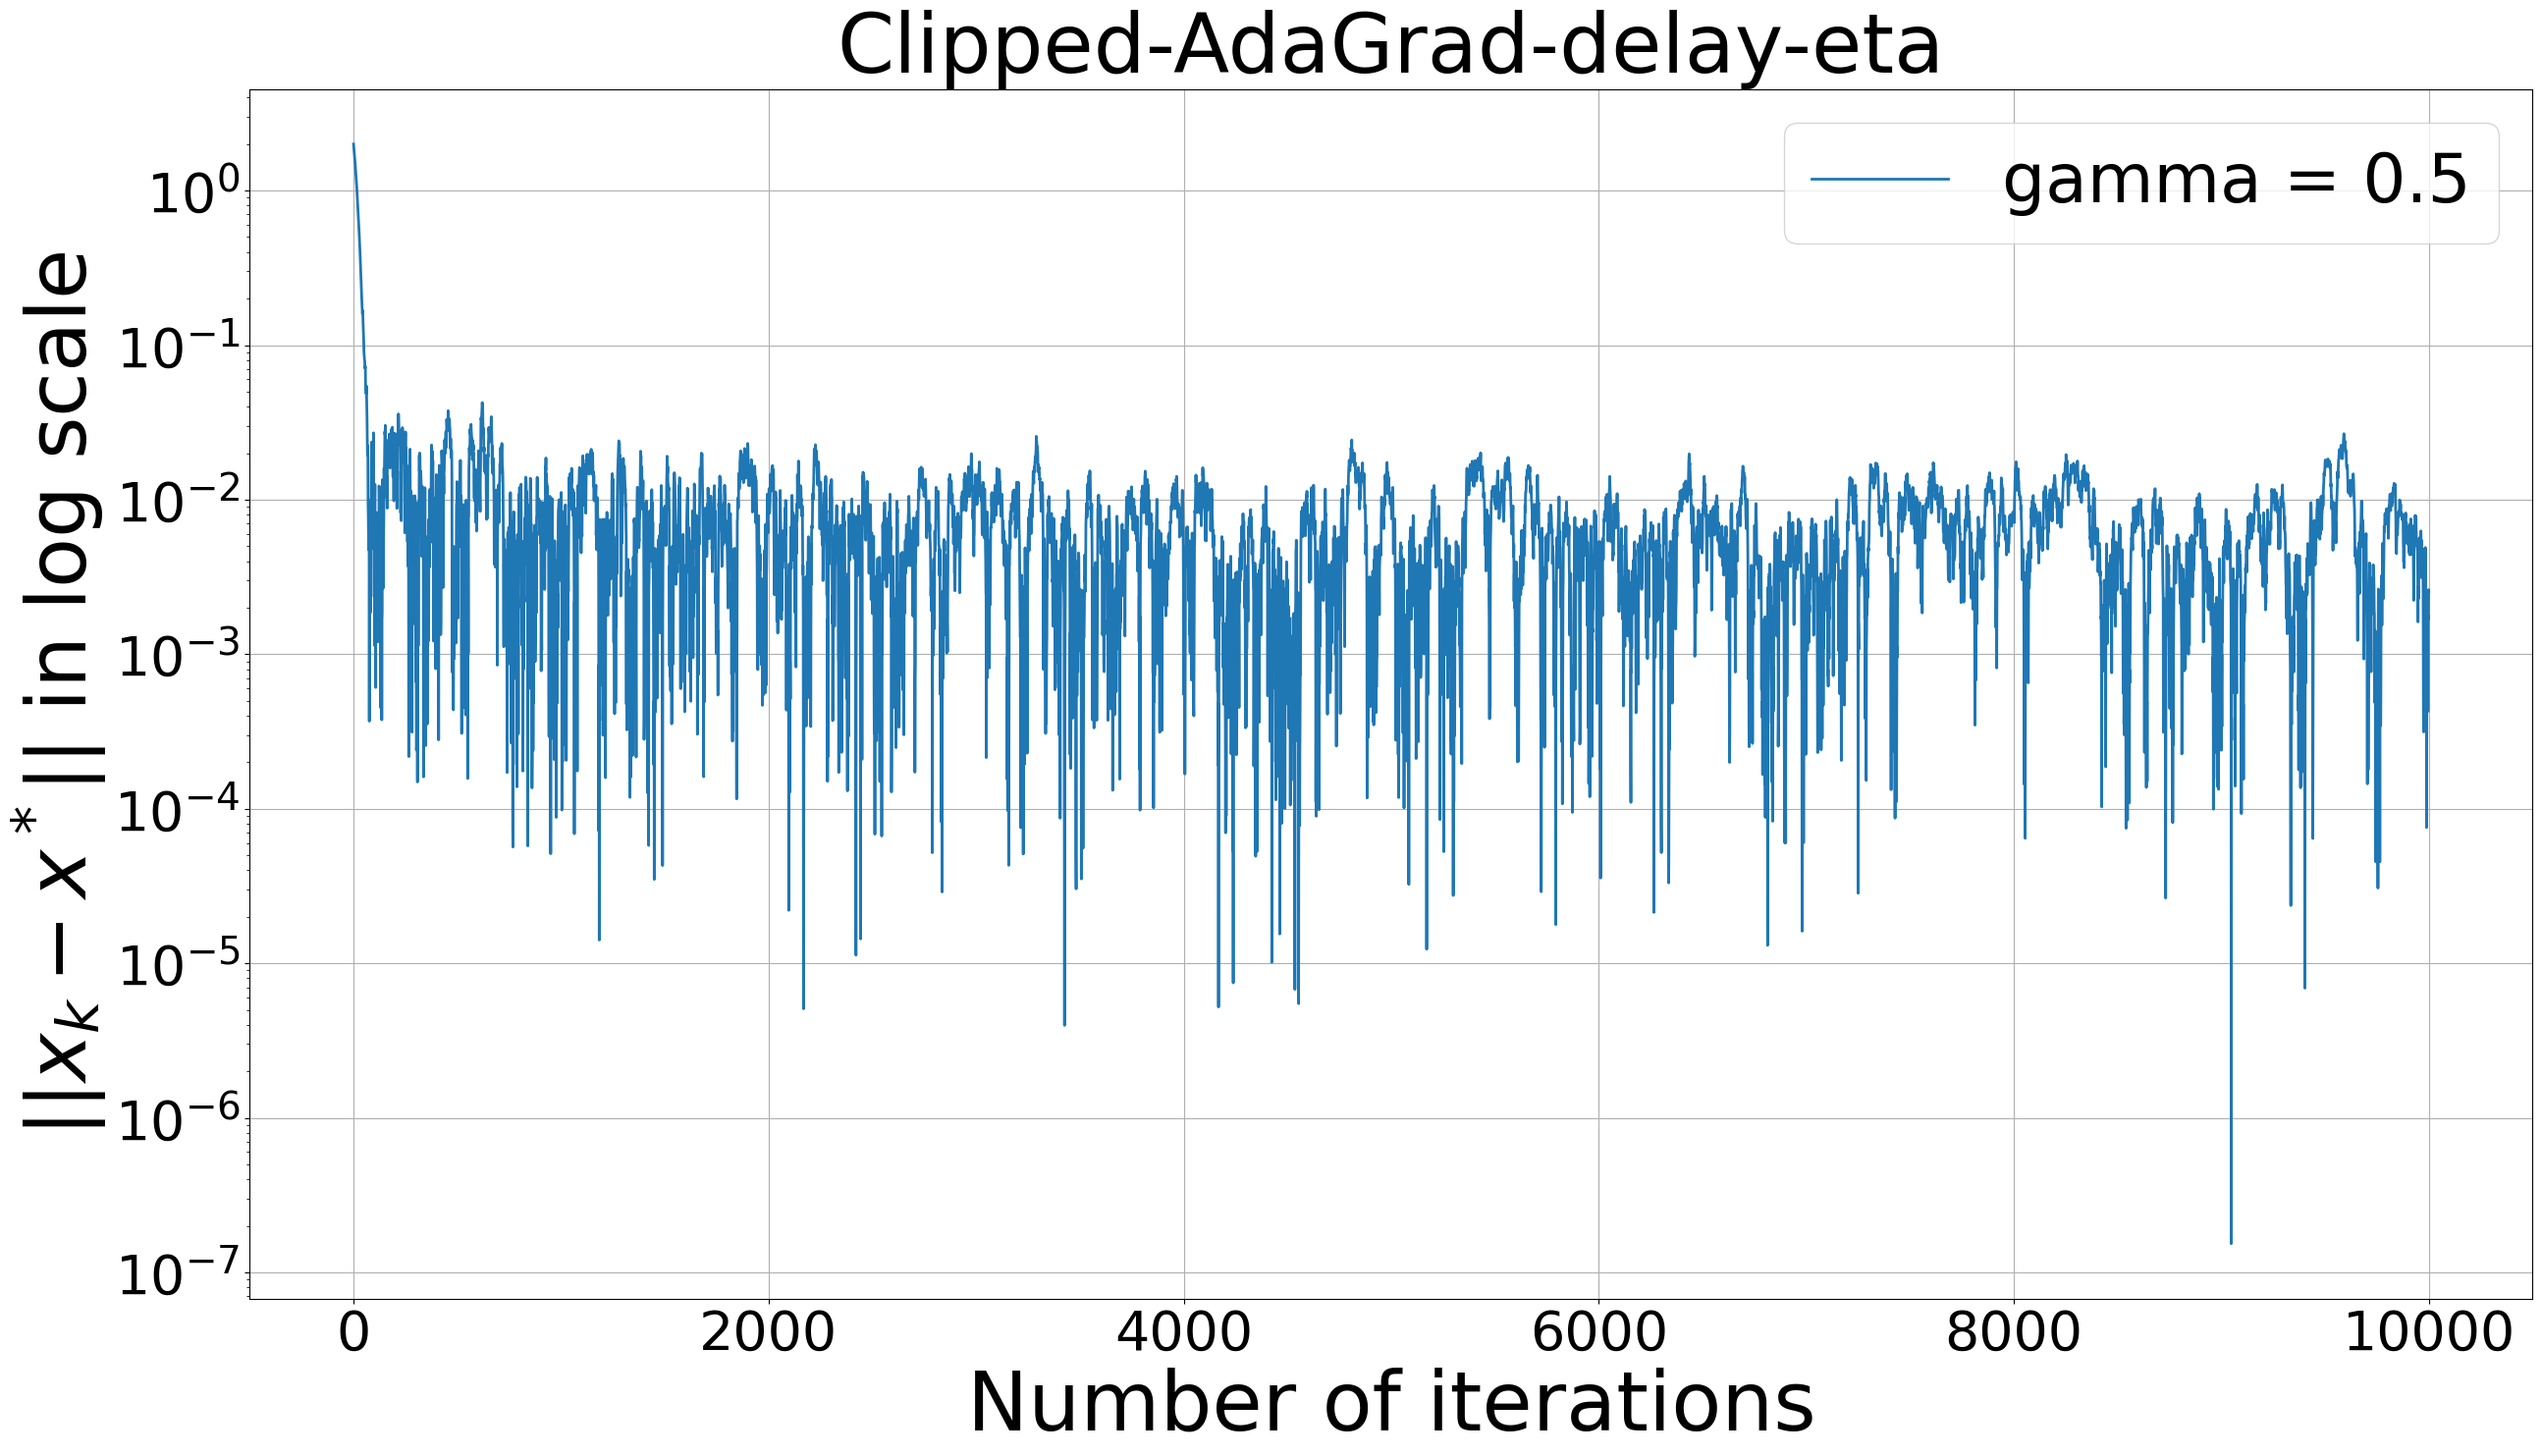

In [5]:
%%time
exp = HeavyTailedSquaredExperiments(start=2, num_iter=10000, b_0=3)
exp.tuning(num_of_stepsizes=1, run_name='demo', flag='Clipped-AdaGrad-delay-eta', repeats=100, gamma=0.5, log_scale=True)

### draw

In [6]:
def visualize(datadict, title=None, keys=[], custom_labels=None, percentiles: list=[10, 50, 90], gamma=1):
    plt.figure(figsize=(30,16), dpi=300)
    colors = sns.color_palette("husl", len(datadict.keys()))
    if keys:
        colors = sns.color_palette("husl", len(keys))
        if custom_labels == None:
            for key, color in zip(keys, colors):
                label, df = key, datadict[key]
                df_gamma = df[df['Gamma'] == gamma]
                percentiles = np.percentile(np.reshape(df_gamma[r'$||x_k - x^*||$'], (100, -1)), [10, 50, 90], axis=0)
                iterations = np.arange(percentiles.shape[1])
                plt.plot(percentiles[1],  label=label, color=color)
                plt.plot(percentiles[0], color=color, alpha=0.2)
                plt.plot( percentiles[2], color=color, alpha=0.2)
                plt.fill_between(iterations, percentiles[0], percentiles[1], color=color, alpha=0.2)
                plt.fill_between(iterations, percentiles[1], percentiles[2], color=color, alpha=0.2)
        else:
            assert (len(custom_labels) == len(keys))
            for key, color, custom_label in zip(keys, colors, custom_labels):
                label, df = custom_label, datadict[key]
                df_gamma = df[df['Gamma'] == gamma]
                percentiles = np.percentile(np.reshape(df_gamma[r'$||x_k - x^*||$'], (100, -1)), [10, 50, 90], axis=0)
                iterations = np.arange(percentiles.shape[1])
                plt.plot(percentiles[1],  label=label, color=color)
                plt.plot(percentiles[0], color=color, alpha=0.2)
                plt.plot( percentiles[2], color=color, alpha=0.2)
                plt.fill_between(iterations, percentiles[0], percentiles[1], color=color, alpha=0.2)
                plt.fill_between(iterations, percentiles[1], percentiles[2], color=color, alpha=0.2)

    else:
        for (label, df), color in zip(datadict.items(), colors):
            df_gamma = df[df['Gamma'] == gamma]
            percentiles = np.percentile(np.reshape(df_gamma[r'$||x_k - x^*||$'], (100, -1)), [10, 50, 90], axis=0)
            iterations = np.arange(percentiles.shape[1])
            plt.plot(percentiles[1],  label=label, color=color)
            plt.plot(percentiles[0], color=color, alpha=0.2)
            plt.plot( percentiles[2], color=color, alpha=0.2)
            plt.fill_between(iterations, percentiles[0], percentiles[1], color=color, alpha=0.2)
            plt.fill_between(iterations, percentiles[1], percentiles[2], color=color, alpha=0.2)

    plt.title(title)
    plt.xlabel('Number of Iterations')
    plt.ylabel(r'$||x_k - x^*||^2$')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()
    plt.show()

In [8]:
num_of_stepsizes = 7
run_name = 'demo'
flag = "Clipped-AdaGrad-delay-eta"
#gammas = [1 / 2**i for i in range(num_of_stepsizes)]
gammas = [0.5]
colors = sns.color_palette("husl", num_of_stepsizes)
data_list = []

for i, (gamma, color) in enumerate(zip(gammas, colors)):
    files = [f"{flag}_{gamma:.4f}_{i}.npy" for i in range(100)]
    data = [np.load(os.path.join(run_name, file)) for file in files]
    data = np.array(data)
    data = np.array([np.abs(d) for d in data])
    
    num_iterations = np.arange(data.shape[1])
    for d in data:
        df = pd.DataFrame({'Number of Iterations': num_iterations, 
                           r'$||x_k - x^*||$': d})
        df['Gamma'] = gamma 
        data_list.append(df)

df = pd.concat(data_list, ignore_index=True)
df[r'$||x_k - x^*||$'] = df[r'$||x_k - x^*||$'] **2
df.to_csv('demo.csv', index=False)
demodict = {"RAdaGradD": pd.read_csv("demo.csv")}

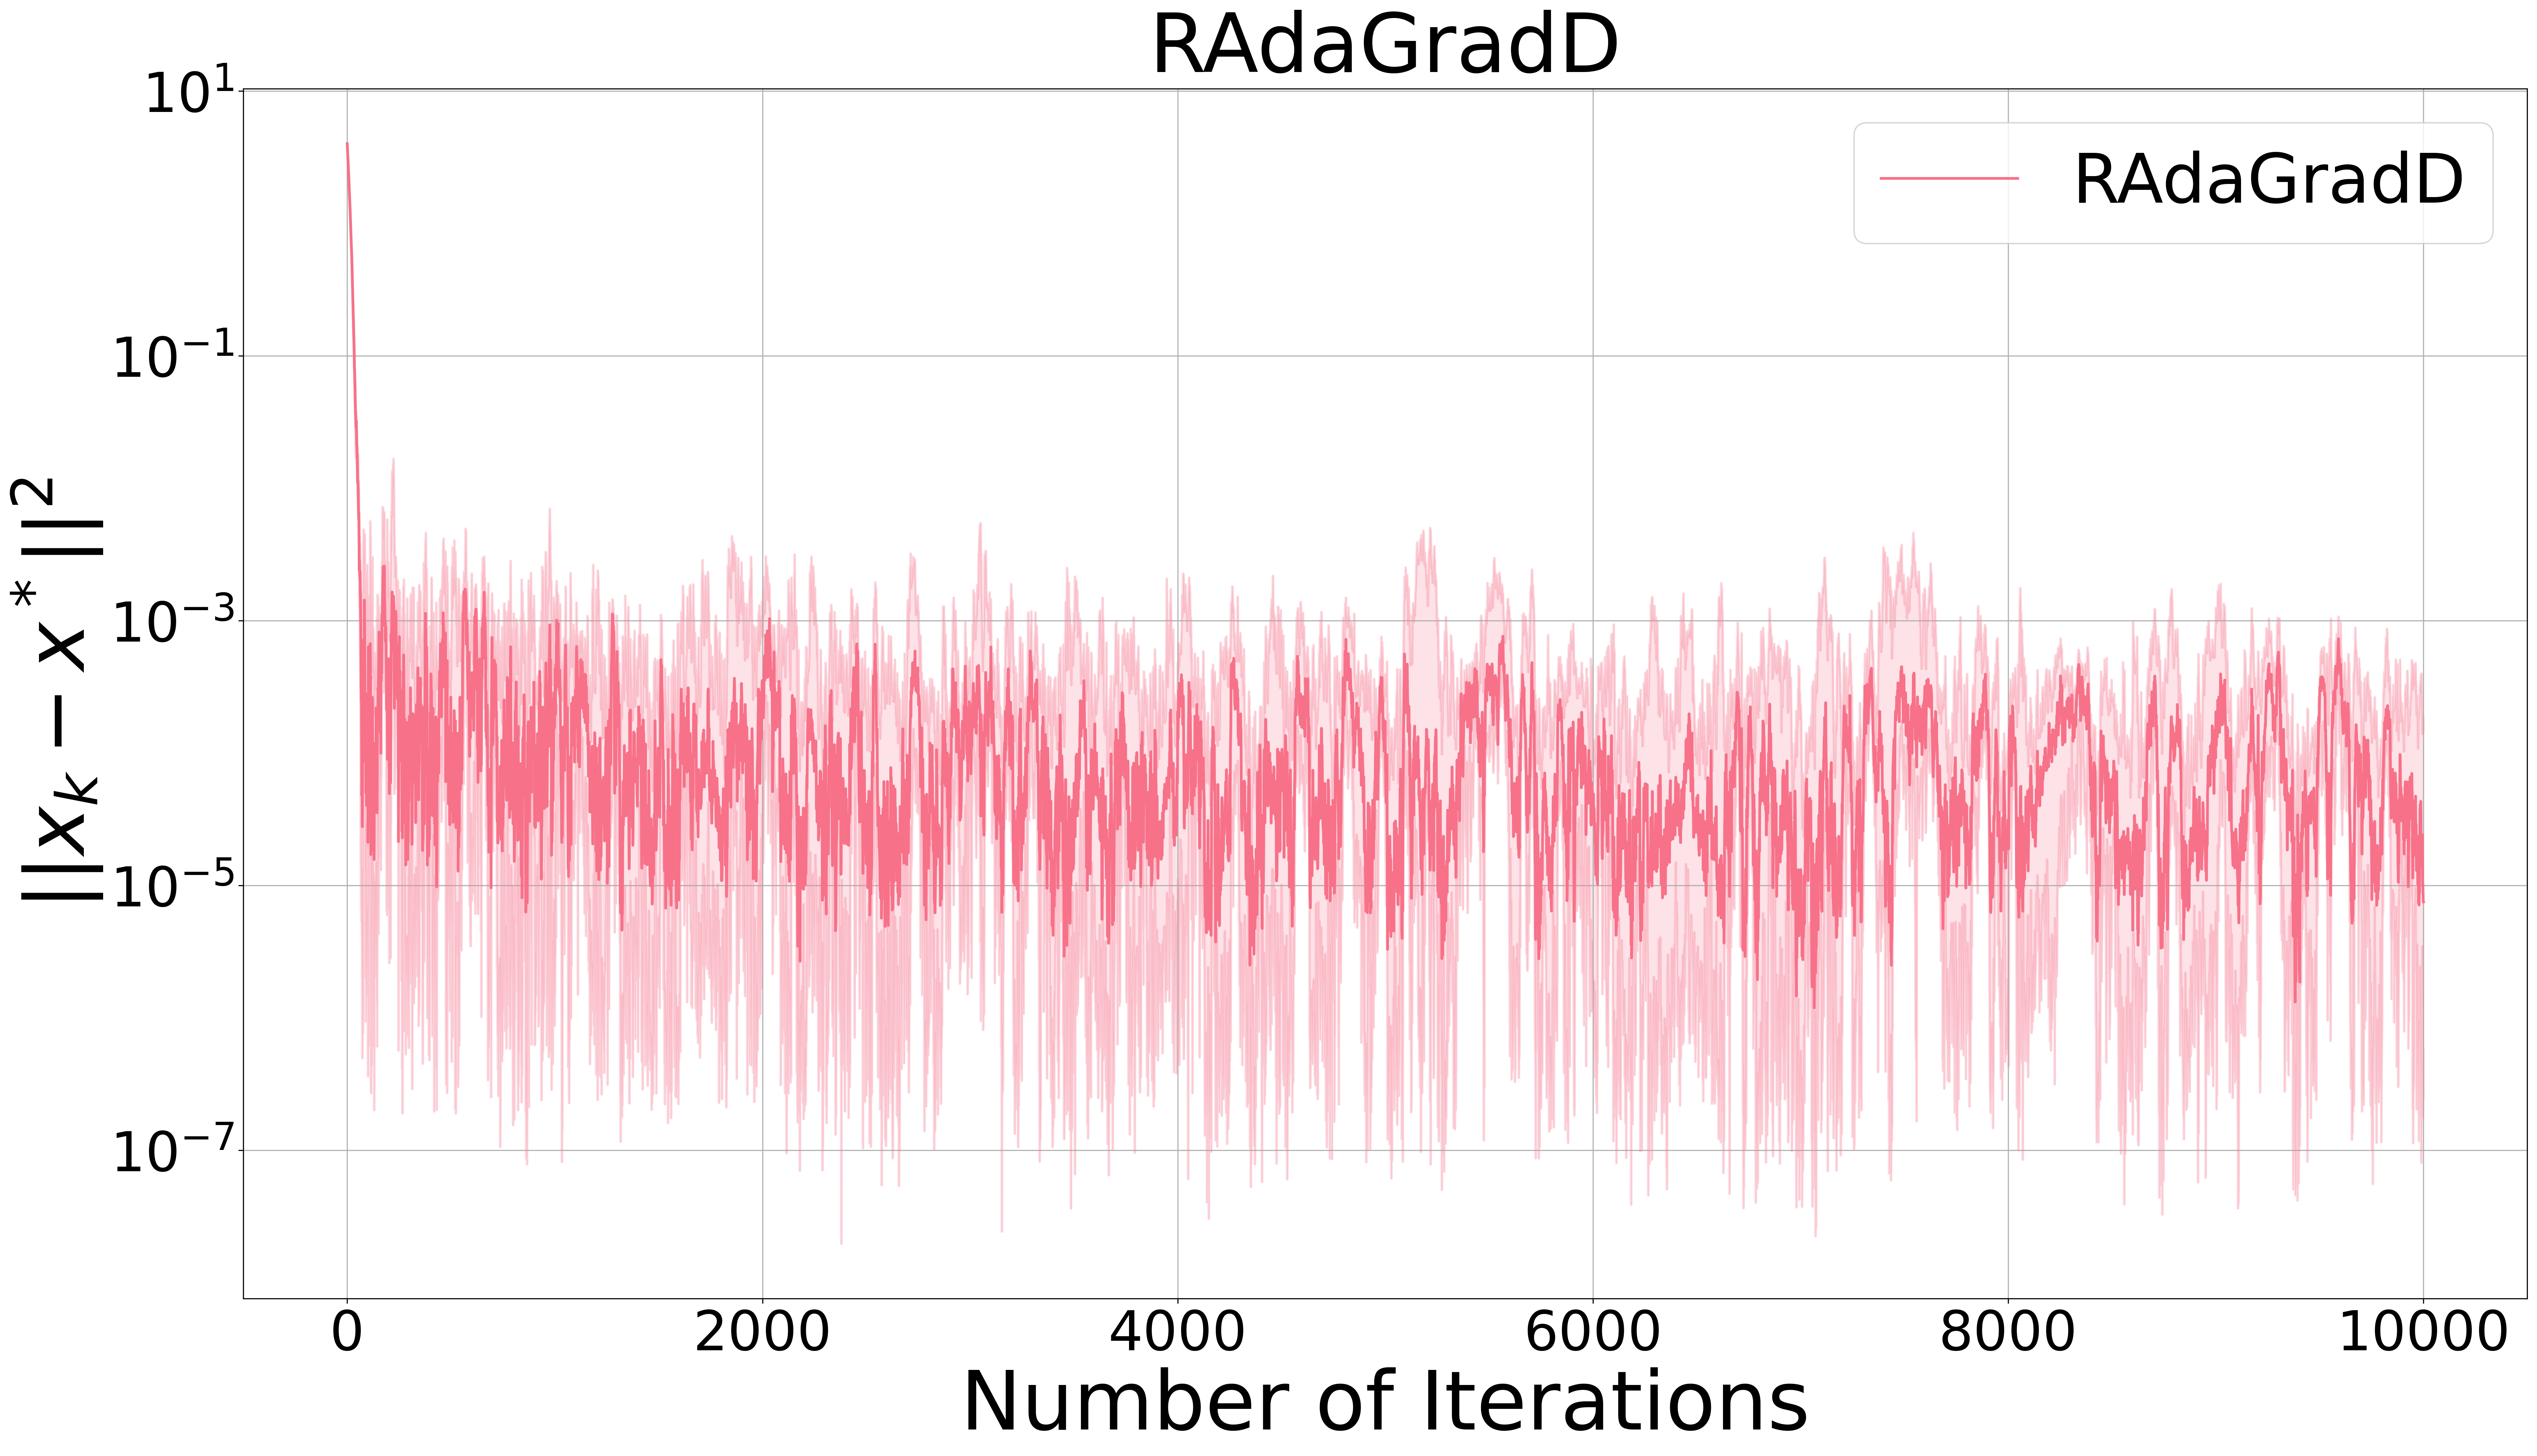

In [10]:
visualize(demodict, title="RAdaGradD", keys=["RAdaGradD"], gamma=0.5)